# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Example-1" data-toc-modified-id="Example-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Example-1</a></div><div class="lev2 toc-item"><a href="#One-hot-Coding" data-toc-modified-id="One-hot-Coding-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>One-hot Coding</a></div><div class="lev3 toc-item"><a href="#Use-Keras-for-Word-Level-One-hot-Encoding" data-toc-modified-id="Use-Keras-for-Word-Level-One-hot-Encoding-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Use Keras for Word Level One-hot Encoding</a></div><div class="lev2 toc-item"><a href="#Embeding-Words" data-toc-modified-id="Embeding-Words-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Embeding Words</a></div><div class="lev2 toc-item"><a href="#IMDB-Example" data-toc-modified-id="IMDB-Example-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>IMDB Example</a></div><div class="lev2 toc-item"><a href="#IMDB-again,-but-Raw-Text" data-toc-modified-id="IMDB-again,-but-Raw-Text-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>IMDB again, but Raw Text</a></div><div class="lev3 toc-item"><a href="#Load-IMBD-Raw-Data" data-toc-modified-id="Load-IMBD-Raw-Data-141"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Load IMBD Raw Data</a></div><div class="lev3 toc-item"><a href="#Use-only-a-Very-Small-Training-Sample-Set" data-toc-modified-id="Use-only-a-Very-Small-Training-Sample-Set-142"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Use only a Very Small Training Sample Set</a></div><div class="lev3 toc-item"><a href="#Get-the-Pre-trained-Word-Embedding" data-toc-modified-id="Get-the-Pre-trained-Word-Embedding-143"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Get the Pre-trained Word Embedding</a></div><div class="lev3 toc-item"><a href="#Prepare-Model-(Not-RNN)" data-toc-modified-id="Prepare-Model-(Not-RNN)-144"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>Prepare Model (Not RNN)</a></div><div class="lev3 toc-item"><a href="#Add-the-Pre-trained-Embedding-Matrix-and-Fix-it" data-toc-modified-id="Add-the-Pre-trained-Embedding-Matrix-and-Fix-it-145"><span class="toc-item-num">1.4.5&nbsp;&nbsp;</span>Add the Pre-trained Embedding Matrix and Fix it</a></div><div class="lev2 toc-item"><a href="#RNN" data-toc-modified-id="RNN-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>RNN</a></div>

# Example-1

## One-hot Coding

What the author did here is not conventional. (rwo and column are flipped?) 
- Suppose we have a dictionary, that includes {word:index, ...,}, and $size = len(dict)$.
- Then the word appears in our sample(training), can find it's index in our dictionary
    $\begin{pmatrix}
The_{102}\\ 
Cat_{333}\\ 
...\\ 
\\ 
..\\ 
\end{pmatrix}$

- The idea is to convert the vector as shown below to one hot encoding, note the maximum length needs to be determined by us (programmer).
If the length of the sentence is greater than maximum lenght, it gets truncated. Then the matrix becomes 

$shape = m, maxLen, size + 1$, the first sentence, e.g., has each column represent one word "The", "cat", etc.

$
\begin{pmatrix}
0&0 & .. &..  & ..\\ 
0&0 & .. &..  & ..\\ 
0&... &..  &..  &.. \\ 
0&1 & .. & .. &.. \\ 
0&... & .. & .. &.. \\ 
0&0 & .. &..  & ..
\end{pmatrix}
$

Note, the first column is 0 in the author's setup, that's why the matrix has a column number = size + 1.

Note: each row is a word.

In [1]:
import numpy as np

In [2]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# Create dictionary with index, starting from 1
token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1

print(token_index)

{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, 'mat.': 6, 'dog': 7, 'ate': 8, 'my': 9, 'homework.': 10}


In [3]:
max_length = 10

In [4]:
samples[0]

'The cat sat on the mat.'

In [5]:
print(list(enumerate(samples[0].split()))[:max_length])

[(0, 'The'), (1, 'cat'), (2, 'sat'), (3, 'on'), (4, 'the'), (5, 'mat.')]


In [21]:
results = np.zeros(shape=(len(samples),
                          max_length,
                          max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]: # max_length is used to truncate a very long sentence.
        index = token_index.get(word)
        print(word, j, index)
        results[i, j, index] = 1

The 0 1
cat 1 2
sat 2 3
on 3 4
the 4 5
mat. 5 6
The 0 1
dog 1 7
ate 2 8
my 3 9
homework. 4 10


In [125]:
token_index

{'The': 1,
 'cat': 2,
 'sat': 3,
 'on': 4,
 'the': 5,
 'mat.': 6,
 'dog': 7,
 'ate': 8,
 'my': 9,
 'homework.': 10}

In [126]:
results[1]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

### Use Keras for Word Level One-hot Encoding

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [40]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words=1000)

print(tokenizer)

tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)

print(sequences)

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

print(one_hot_results)

print(one_hot_results.shape)

word_index = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index))


[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
(2, 1000)
Found 9 unique tokens.


## Embeding Words

## IMDB Example

In [6]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing

In [7]:
max_features = 10000
maxlen = 20

- Just like the MNIST dataset, the IMDB dataset comes packaged with Keras. It has already been preprocessed: the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.
- The argument num_words=10000 means you’ll only keep the top 10,000 most fre- quently occurring words in the training data. Rare words will be discarded. This allows you to work with vector data of manageable size.
- y_train is either "positive" or "negative", alternatilvey, 1 or 0, respectively.

In [9]:
(x_train, y_train), (x_test, y_test) = imdb.load_data( num_words=max_features)

print(x_train.shape)
print(len(x_train[0]))
print(y_train.shape)
print(y_train[0])

(25000,)
218
(25000,)
1


Because you’re restricting yourself to the top 10,000 most frequent words, no word
index will exceed 10,000:

In [102]:
print(max([max(sequence) for sequence in x_train]))

# Add a function to see what's inside
def decode_int_to_sentence(x):
    word_index = imdb.get_word_index()
    # word_index is a dictionary mapping words to an integer index.
    reverse_word_index = dict(
        [(value, key) for (key, value) in word_index.items()])
    decoded_review = ' '.join(
        [reverse_word_index.get(i - 3, '?') for i in x])
    return decoded_review

print(decode_int_to_sentence(x_train[1]))

9999
? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then


In [103]:
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences
# Example, 
#tf.keras.preprocessing.sequence.pad_sequences(
#    sequences, maxlen=None, dtype='int32', padding='pre',
#    truncating='pre', value=0.0
#)
# sequences is iterable, each sequence inside the sequences will be padded with some values
# value --> set the padding value
# padding/truncating --> meaning, either padding pre or post
# return --> Numpy array with shape (len(sequences), maxlen)

x_train_new = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test_new = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [104]:
print(x_train.shape)

(25000,)


In [105]:
print(x_train_new.shape)

(25000, 20)


In [108]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Embedding

In [ ]:
embedding_layer = Embedding(1000, 64)

In [123]:
embedding_layer

In [ ]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))

model.add(Flatten())
model.add(Dense(1, activation='sigmoid')) 

But note that merely flattening the embedded sequences and training a single Dense layer on top leads to a model that treats each word in the input sequence separately, without considering inter-word relationships and sentence structure (for example, this model would likely treat both “this movie is a bomb” and “this movie is the bomb” as being negative reviews). It’s much better to add recurrent layers or 1D convolutional layers on top of the embedded sequences to learn features that take into account each sequence as a whole. That’s what we’ll focus on in the next few sections.

In [110]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [116]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [121]:
history = model.fit(x_train_new, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 1s 884us/step - loss: 0.6850 - acc: 0.5653 - val_loss: 0.6116 - val_acc: 0.7018
Epoch 2/10
625/625 [==============================] - 0s 700us/step - loss: 0.5602 - acc: 0.7466 - val_loss: 0.5202 - val_acc: 0.7362
Epoch 3/10
625/625 [==============================] - 0s 696us/step - loss: 0.4644 - acc: 0.7874 - val_loss: 0.4969 - val_acc: 0.7486
Epoch 4/10
625/625 [==============================] - 0s 725us/step - loss: 0.4306 - acc: 0.8024 - val_loss: 0.4924 - val_acc: 0.7544
Epoch 5/10
625/625 [==============================] - 0s 723us/step - loss: 0.3962 - acc: 0.8277 - val_loss: 0.4933 - val_acc: 0.7566
Epoch 6/10
625/625 [==============================] - 0s 779us/step - loss: 0.3773 - acc: 0.8293 - val_loss: 0.4958 - val_acc: 0.7578
Epoch 7/10
625/625 [==============================] - 0s 705us/step - loss: 0.3579 - acc: 0.8433 - val_loss: 0.4985 - val_acc: 0.7580
Epoch 8/10
625/625 [==============================] - 0s 761us

## IMDB again, but Raw Text

### Load IMBD Raw Data

In [127]:
import os
imdb_dir = '/Users/junsu/Dropbox/deep_learning/tf1/tf1_lib/data_inputs/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)


In [130]:
print(len(texts))

25000


In [131]:
print(len(labels))

25000


In [132]:
print(texts[0])
print(labels[0])

Working with one of the best Shakespeare sources, this film manages to be creditable to it's source, whilst still appealing to a wider audience.<br /><br />Branagh steals the film from under Fishburne's nose, and there's a talented cast on good form.
0


### Use only a Very Small Training Sample Set

In [134]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [138]:
maxlen = 100 #Cuts off reviews after 100 word
training_samples = 200 #Trains on 200 samples
validation_samples = 10000 #Validates on 10,000 sample
max_words = 10000

In [139]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [140]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 88582 unique tokens.


In [141]:
data = pad_sequences(sequences, maxlen=maxlen)

In [142]:
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [143]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [145]:
print(indices)

[16653  8790 17019 ... 18761 13626  3715]


In [146]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples] 
y_val = labels[training_samples: training_samples + validation_samples]

### Get the Pre-trained Word Embedding

In [147]:
glove_dir = '/Users/junsu/Dropbox/deep_learning/tf1/tf1_lib/data_inputs/glove.6B'


In [148]:
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [149]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

### Prepare Model (Not RNN)

In [150]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

In [151]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


### Add the Pre-trained Embedding Matrix and Fix it

In [152]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [153]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 1s 63ms/step - loss: 1.7531 - acc: 0.4493 - val_loss: 1.4916 - val_acc: 0.4966
Epoch 2/10
7/7 [==============================] - 0s 45ms/step - loss: 0.8722 - acc: 0.6064 - val_loss: 1.5668 - val_acc: 0.4966
Epoch 3/10
7/7 [==============================] - 0s 50ms/step - loss: 0.7402 - acc: 0.6105 - val_loss: 0.8190 - val_acc: 0.5070
Epoch 4/10
7/7 [==============================] - 0s 50ms/step - loss: 0.3048 - acc: 0.8787 - val_loss: 0.7341 - val_acc: 0.5595
Epoch 5/10
7/7 [==============================] - 0s 55ms/step - loss: 0.2858 - acc: 0.8907 - val_loss: 0.7268 - val_acc: 0.5681
Epoch 6/10
7/7 [==============================] - 0s 55ms/step - loss: 0.0721 - acc: 0.9981 - val_loss: 0.7628 - val_acc: 0.5680
Epoch 7/10
7/7 [==============================] - 0s 42ms/step - loss: 0.0401 - acc: 1.0000 - val_loss: 0.7601 - val_acc: 0.5693
Epoch 8/10
7/7 [==============================] - 0s 38ms/step - loss: 0.0257 - acc: 1.0000 - val

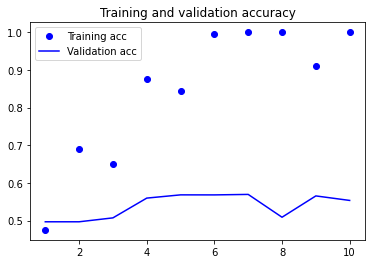

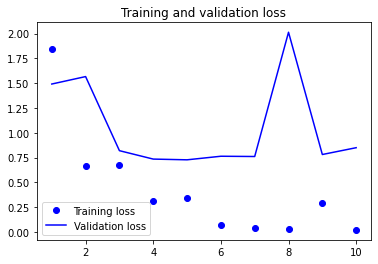

In [154]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### 

## RNN

In [11]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [15]:
max_features = 10000 #Number of words to consider as features
maxlen = 500 #Cuts off texts after this many words (among the max_features most common words)

batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [36]:
print(input_train.shape) 
# input_train returns (25000, ), however, it is a nested list, the reason why it's one element tuple shape, is because the inner lists have different length
# which is the review sentence converted to integers

(25000,)


In [19]:
print(y_train.shape)
# y_train.shape is an "one-elemnt-tuple", is because it's a list that includes element either 0 or 1

(25000,)

- Just like the MNIST dataset, the IMDB dataset comes packaged with Keras. It has already been preprocessed: the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.
- The argument num_words=10000 means you’ll only keep the top 10,000 most fre- quently occurring words in the training data. Rare words will be discarded. This allows you to work with vector data of manageable size.
- y_train is either "positive" or "negative", alternatilvey, 1 or 0, respectively.

In [12]:
print('Pad sequences (samples x time)')

# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences
# Example, 
#tf.keras.preprocessing.sequence.pad_sequences(
#    sequences, maxlen=None, dtype='int32', padding='pre',
#    truncating='pre', value=0.0
#)
# sequences is iterable, each sequence inside the sequences will be padded with some values
# value --> set the padding value
# padding/truncating --> meaning, either padding pre or post
# return --> Numpy array with shape (len(sequences), maxlen)

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [14]:
input_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [35]:
# # Python ndarray, shape with single element tuple.
# np.array([1,2,3])
# print(np.array([1,2,3]).reshape(3,).tolist())
# print(np.array([1,2,3]).reshape(3,1).tolist())
# print(np.array([1,2,3]).reshape(1,3).tolist())

# print(np.array([1,2,3]).reshape(1,3,1).tolist())
# print(np.array([1,2,3]).reshape(1,3,1,1).tolist())


[1, 2, 3]
[[1], [2], [3]]
[[1, 2, 3]]
[[[1], [2], [3]]]
[[[[1]], [[2]], [[3]]]]
